In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# remove infrequent words. you can play with this parameter as it will likely impact model quality
num_words = 20000
batch_size = 50
(train_sequences, train_labels), (test_sequences, test_labels) = tf.keras.datasets.imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# it would be better to do something like this
# all sequences above maxlen will be truncated to that length
# note: pad_sequences has "pre" and "post" options for both padding and truncation. one may be better than the other!
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=200, truncating='post')
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels)).batch(batch_size)

test_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=200, truncating='post')
test_data = tf.data.Dataset.from_tensor_slices((test_sequences_padded, test_labels)).batch(batch_size)
# for sequence_batch, label_batch in train_data:
  # print(label_batch.shape)# train_sequences_padded[:1]

In [7]:
Weight_hidden = tf.Variable(tf.random.uniform(shape = [batch_size, batch_size], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
bias_hidden = tf.Variable(np.zeros(num_words, dtype=np.float32))

Weight_w = tf.Variable(tf.random.uniform(shape = [batch_size, batch_size], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
Weight_u = tf.Variable(tf.random.uniform(shape = [batch_size, batch_size], minval = -0.1, maxval = 0.1, dtype = tf.dtypes.float32))
bias_b = tf.Variable(np.zeros(num_words, dtype=np.float32))

variables  = [Weight_hidden, bias_hidden, Weight_w, Weight_u, bias_b]

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
train_acc_metric = tf.metrics.SparseCategoricalAccuracy()


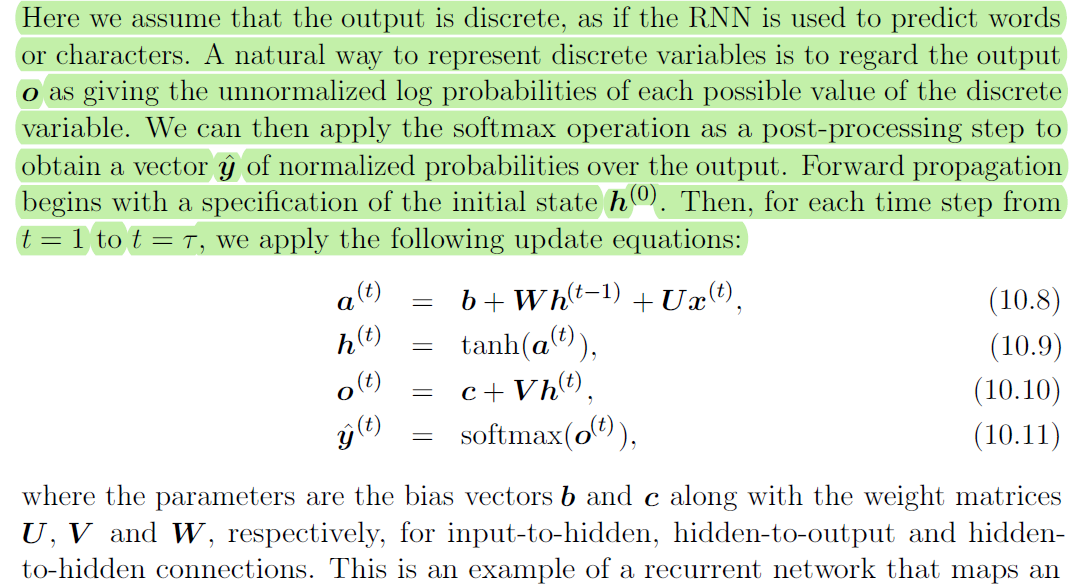

# single unit, and use binary cross-entropy


In [15]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def train_loop(set_name):
    for sequence_batch, label_batch in train_data:
        train_step(sequence_batch, label_batch, set_name)

def train_step(sequences, labels, set_name):
    with tf.GradientTape(persistent=True) as tape:
        logits = rnn_loop(sequences)
        loss = loss_fn(labels, logits)
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    del tape

    preds = tf.argmax(logits, axis=1, output_type=tf.int64)
    acc = tf.reduce_mean(tf.cast(tf.equal(preds, labels),
                          tf.float32))
    print("{} loss: {} Batch accuracy: {}".format(set_name,loss, acc))

def rnn_loop(sequences):
    old_state = tf.Variable(np.zeros((batch_size,num_words), dtype=np.float32))

    for step in range(200):
        x_t = sequences[:, step]
        x_t = tf.one_hot(x_t, depth=num_words)
        new_state = rnn_step(old_state, x_t)

        old_state = new_state

    o_t = output_layer_single(new_state)
    return o_t


def rnn_step(state, x_t):
  a_t = bias_b + tf.matmul(Weight_w, x_t) + tf.matmul(Weight_u,state)
  h_t = tf.nn.tanh(a_t)

  return h_t

def output_layer_single(state):
  output_1 = bias_hidden + tf.matmul(Weight_hidden, state)
  output = tf.keras.layers.Dense(1)(output_1)
  return output

train_loop('Training')


Training loss: 0.6932688355445862 Batch accuracy: 0.5799999833106995
Training loss: 0.731143057346344 Batch accuracy: 0.5799999833106995
Training loss: 0.7362916469573975 Batch accuracy: 0.5799999833106995
Training loss: 0.8756103515625 Batch accuracy: 0.5600000023841858
Training loss: 1.3955212831497192 Batch accuracy: 0.41999998688697815
Training loss: 0.998137891292572 Batch accuracy: 0.46000000834465027
Training loss: 1.2949985265731812 Batch accuracy: 0.36000001430511475
Training loss: 2.187206745147705 Batch accuracy: 0.5400000214576721
Training loss: 1.0841046571731567 Batch accuracy: 0.47999998927116394
Training loss: 1.0320948362350464 Batch accuracy: 0.4399999976158142
Training loss: 0.8240600824356079 Batch accuracy: 0.5
Training loss: 0.91339111328125 Batch accuracy: 0.4000000059604645
Training loss: 1.390753149986267 Batch accuracy: 0.5600000023841858
Training loss: 7.144947528839111 Batch accuracy: 0.47999998927116394
Training loss: 2.4663612842559814 Batch accuracy: 0.51

In [17]:
def test_loop(set_name):
    for sequence_batch, label_batch in test_data:
        train_step(sequence_batch, label_batch, set_name)


test_loop('Validation')


Validation loss: 4.2838921546936035 Batch accuracy: 0.46000000834465027
Validation loss: 4.5606255531311035 Batch accuracy: 0.47999998927116394
Validation loss: 3.0880725383758545 Batch accuracy: 0.6000000238418579
Validation loss: 3.2285382747650146 Batch accuracy: 0.6600000262260437
Validation loss: 1.369399070739746 Batch accuracy: 0.47999998927116394
Validation loss: 2.5909430980682373 Batch accuracy: 0.5
Validation loss: 2.1203932762145996 Batch accuracy: 0.5
Validation loss: 2.8367385864257812 Batch accuracy: 0.46000000834465027
Validation loss: 1.063491940498352 Batch accuracy: 0.5400000214576721
Validation loss: 6.114556789398193 Batch accuracy: 0.5600000023841858
Validation loss: 2.347079038619995 Batch accuracy: 0.3400000035762787
Validation loss: 0.9199422597885132 Batch accuracy: 0.46000000834465027
Validation loss: 3.2576379776000977 Batch accuracy: 0.6600000262260437
Validation loss: 1.5793954133987427 Batch accuracy: 0.6000000238418579
Validation loss: 2.717195749282837 

# 2 units, and use sparse categorical cross-entropy


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def train_loop1(set_name):
    for sequence_batch, label_batch in train_data:
        train_step1(sequence_batch, label_batch, set_name)

def train_step1(sequences, labels, set_name):
    with tf.GradientTape(persistent=True) as tape:
        logits = rnn_loop1(sequences)
        loss = loss_fn(labels, logits)
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    del tape

    preds = tf.argmax(logits, axis=1, output_type=tf.int64)
    acc = tf.reduce_mean(tf.cast(tf.equal(preds, labels),
                          tf.float32))
    print("{} loss: {} Batch accuracy: {}".format(set_name,loss, acc))

def rnn_loop1(sequences):
    old_state = tf.Variable(np.zeros((batch_size,num_words), dtype=np.float32))

    for step in range(200):
        x_t = sequences[:, step]
        x_t = tf.one_hot(x_t, depth=num_words)
        new_state = rnn_step1(old_state, x_t)

        old_state = new_state

    o_t = output_layer_two(new_state)

    return o_t


def rnn_step1(state, x_t):
  a_t = bias_b + tf.matmul(Weight_w, x_t) + tf.matmul(Weight_u,state)
  h_t = tf.nn.tanh(a_t)

  return h_t


def output_layer_two(state):
  output_1 = bias_hidden + tf.matmul(Weight_hidden, state)
  output = tf.keras.layers.Dense(2)(output_1)
  return output

train_loop1('Training')


Training loss: 2.7746076583862305 Batch accuracy: 0.5199999809265137
Training loss: 16.340259552001953 Batch accuracy: 0.4000000059604645
Training loss: 7.94760799407959 Batch accuracy: 0.41999998688697815
Training loss: 1.5718644857406616 Batch accuracy: 0.5199999809265137
Training loss: 2.3794167041778564 Batch accuracy: 0.4399999976158142
Training loss: 4.494605541229248 Batch accuracy: 0.46000000834465027
Training loss: 2.4533469676971436 Batch accuracy: 0.6399999856948853
Training loss: 5.716354846954346 Batch accuracy: 0.47999998927116394
Training loss: 3.3981528282165527 Batch accuracy: 0.46000000834465027
Training loss: 5.616823673248291 Batch accuracy: 0.3799999952316284
Training loss: 4.0842132568359375 Batch accuracy: 0.5799999833106995
Training loss: 7.001291275024414 Batch accuracy: 0.41999998688697815
Training loss: 4.02970552444458 Batch accuracy: 0.5799999833106995
Training loss: 4.034358978271484 Batch accuracy: 0.4399999976158142
Training loss: 4.134666442871094 Batch

In [ ]:
def test_loop1(set_name):
    for sequence_batch, label_batch in test_data:
        train_step1(sequence_batch, label_batch, set_name)


test_loop1('Validation')


# Food for thought 1:
Why is padding wasteful?
--------------------
Does not impact the model learning, still processed, and waste of computational resource.

cue - 'RNNs canwork on arbitrary
sequence lengths, that training minibatches are pretty much independent of each other.'

*   sort the data
*   split same length sequence into batches
*   shuffle

#Food for thought 2:
Between truncating long sequences and removing them, which option do you think is better? Why?
------------------------


*   Truncate con - Data holding valuable information is lost



*   Removal con - same
*   Removal pro - focuses on the most informative sequences





#Food for thought 3:
Can you think of a way to avoid the one-hot vectors
-----------------



*Higher test accuracy, while the test loss is also increasing (how can this be?)*
----------------

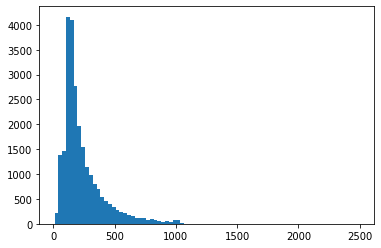

In [8]:
# overview over sequence lengths in the data
# could also look at mean, median, standard deviation...
plt.hist(sequence_lengths, bins=80)
plt.show()

In [71]:
# now we can create a dataset!
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

In [7]:
# all sequences are... very long
train_sequences_padded.shape
train_labels.shape

(25000,)

In [30]:
# to restore words, load the word-to-index mapping
word_to_index = tf.keras.datasets.imdb.get_word_index()

In [32]:
# invert to get index-to-word mapping
index_to_word = dict((index, word) for (word, index) in word_to_index.items())

In [34]:
# for fun, you can look at the word-index mappings.
# in this case, the mapping was done according to word frequency.
# you can pass reverse=True to sorted() to look at the least common words.
sorted(index_to_word.items(), reverse=True)[:100]

[(88584, "'l'"),
 (88583, "voorhees'"),
 (88582, 'artbox'),
 (88581, 'copywrite'),
 (88580, "pipe's"),
 (88579, 'wheelers'),
 (88578, 'sics'),
 (88577, 'transacting'),
 (88576, 'chicatillo'),
 (88575, 'ev'),
 (88574, 'urrrghhh'),
 (88573, 'airsoft'),
 (88572, "nemesis'"),
 (88571, "guard's"),
 (88570, "'solve'"),
 (88569, 'odilon'),
 (88568, "baywatch'"),
 (88567, 'heralding'),
 (88566, 'lubricated'),
 (88565, 'percival'),
 (88564, 'reble'),
 (88563, 'fountainhead'),
 (88562, "olan's"),
 (88561, 'amitabhs'),
 (88560, 'contradictors'),
 (88559, 'wight'),
 (88558, "bearings'"),
 (88557, 'lederer'),
 (88556, "'half"),
 (88555, 'expeditious'),
 (88554, 'maize'),
 (88553, 'slahsers'),
 (88552, "mariner's"),
 (88551, "'hall"),
 (88550, 'unoticeable'),
 (88549, 'fitzgibbon'),
 (88548, 'intercontenital'),
 (88547, 'empahh'),
 (88546, 'daud'),
 (88545, 'swinginest'),
 (88544, 'thoroughfare'),
 (88543, 'pensaba'),
 (88542, 'miniskirts'),
 (88541, 'uneffective'),
 (88540, 'catepillar'),
 (88539, 